<a href="https://colab.research.google.com/github/Miolith/nlp3-labs/blob/master/lab2/Lab2_EPITA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import pandas as pd 

from IPython.display import HTML

In [2]:
%%capture
! pip install fasttext

# I. Language detection (24 points)

## Setup 

In [3]:
! git clone https://github.com/MastafaF/LanguageDetection.git

Cloning into 'LanguageDetection'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 2), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [4]:
os.listdir("./LanguageDetection")

['.git', 'dataset.csv.zip', '.gitignore', 'LICENSE', 'README.md']

In [5]:
# CD the LanguageDetection folder - we are working in the below folder now
os.chdir("./LanguageDetection")

In [6]:
! unzip dataset.csv.zip

Archive:  dataset.csv.zip
  inflating: dataset.csv             


## Data Exploration Analysis

In [7]:
data = pd.read_csv("./dataset.csv")

In [8]:
# Sample of the data
HTML(data[data.language == "Chinese"].sample().to_html())

,Text,language
7913,台灣作家張瑞芬表示自己如果習慣現代都市生活，會害怕凶猛華麗的戰鬥場面。並且認為賽片難在影展得獎，因為「當前世界是非紛擾，談和平還來不及，你在那兒表彰以眼還眼的殺戮邏輯、暴力美學，挑釁西方基督教文明與人道的普世價值嘛！」張也將魏德聖明知賽片不受歡迎仍然投資拍攝的態度與劇中莫那·魯道以及活得像真正的人的主題相比較。張並以佛洛伊德「文明及其不滿」概念解釋，認為莫那·魯道的反抗是出於傳統的人民被文明社會「異化」而產生的恐慌與憤怒。張又認為在上集戰鬥舞一幕顯示賽片所說真正的人是獵人，並認為不該以深山環境以外的觀點來理解霧社事件，並且回顧幾部相關台灣文學作品的觀點。張文中並且將片中賽德克人的忍耐與現代上班族生活比較，以及將獵人的態度與現代原住民的抗議比較，並且表達認同。,Chinese


### Question 1. Describe the distribution of languages and give at least two comments about the dataset. (1 point)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


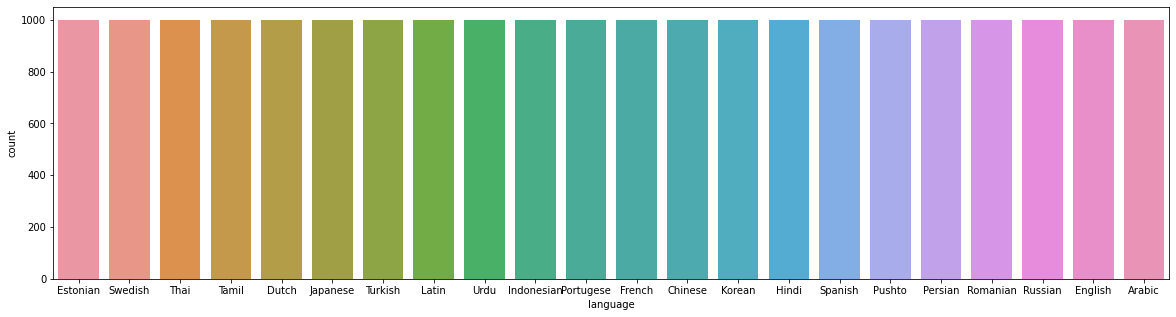

In [9]:
################################################
# your implementation goes here
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
sns.countplot(data.language)
plt.show()
##################################################

### Question 2-5. Explore the data with your own preprocessing and train your model

In [59]:

import numpy as np
from sklearn.model_selection import train_test_split

X=data['Text']
y=data['language']


################################################
# your implementation goes here
import string

def preprocess_text(X, y):
    X = X.str.lower()
    X = X.str.replace('[{}]'.format(string.punctuation + "，。！？【】（）％＃＠＆《》"), ' ', regex=True)
    
    # Add space between chinese characters
    X = X.str.replace(r'([\u4e00-\u9fff])', r' \1 ', regex=True)
    # Add space between thai characters
    X = X.str.replace(r'([\u0e00-\u0e7f])', r' \1 ', regex=True)
    return X

X = preprocess_text(X, y)

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

nb = Pipeline([('vect', CountVectorizer(max_features=15000, token_pattern=r'(?u)\b[^ ]+\b')),
                ('clf', MultinomialNB()),
                ])

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print(classification_report(y_pred, y_test))

################################################

              precision    recall  f1-score   support

      Arabic       0.99      0.99      0.99       202
     Chinese       0.99      0.98      0.99       204
       Dutch       0.98      0.99      0.98       198
     English       1.00      0.78      0.88       257
    Estonian       0.96      1.00      0.98       192
      French       0.99      0.96      0.98       208
       Hindi       0.96      1.00      0.98       193
  Indonesian       0.97      1.00      0.98       194
    Japanese       0.99      1.00      0.99       198
      Korean       0.97      1.00      0.98       194
       Latin       0.93      0.99      0.96       188
     Persian       0.99      1.00      0.99       198
   Portugese       0.96      0.99      0.98       195
      Pushto       0.96      0.99      0.98       193
    Romanian       0.98      0.99      0.99       197
     Russian       0.99      0.99      0.99       200
     Spanish       0.99      0.99      0.99       199
     Swedish       1.00    

## FastText for language detection

## FastText training setup 

In [38]:
! wget http://downloads.tatoeba.org/exports/sentences.tar.bz2

--2023-01-04 16:19:40--  http://downloads.tatoeba.org/exports/sentences.tar.bz2
Resolving downloads.tatoeba.org (downloads.tatoeba.org)... 94.130.77.194
Connecting to downloads.tatoeba.org (downloads.tatoeba.org)|94.130.77.194|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.tatoeba.org/exports/sentences.tar.bz2 [following]
--2023-01-04 16:19:40--  https://downloads.tatoeba.org/exports/sentences.tar.bz2
Connecting to downloads.tatoeba.org (downloads.tatoeba.org)|94.130.77.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172433658 (164M) [application/octet-stream]
Saving to: ‘sentences.tar.bz2’

sentences.tar.bz2   100%[===================>] 164.45M   216MB/s    in 0.8s    

2023-01-04 16:19:41 (216 MB/s) - ‘sentences.tar.bz2’ saved [172433658/172433658]



In [39]:
! bunzip2 sentences.tar.bz2

In [40]:
! ls

dataset.csv  dataset.csv.zip  LICENSE  README.md  sentences.tar


In [41]:
! tar xvf sentences.tar

sentences.csv


In [42]:
! ls

dataset.csv  dataset.csv.zip  LICENSE  README.md  sentences.csv  sentences.tar


In [43]:
! head -10 sentences.csv

1	cmn	我們試試看！
2	cmn	我该去睡觉了。
3	cmn	你在干什麼啊？
4	cmn	這是什麼啊？
5	cmn	今天是６月１８号，也是Muiriel的生日！
6	cmn	生日快乐，Muiriel！
7	cmn	Muiriel现在20岁了。
8	cmn	密码是"Muiriel"。
9	cmn	我很快就會回來。
10	cmn	我不知道。


In [44]:
! awk -F"\t" '{print"__label__"$2" "$3}' < sentences.csv | shuf > all.txt

In [45]:
! ls

all.txt      dataset.csv.zip  README.md      sentences.tar
dataset.csv  LICENSE	      sentences.csv


In [46]:
! head -5 all.txt

__label__deu Ich erblickte in der Menschenmenge einen alten Freund.
__label__eng He tried to convince them of his innocence.
__label__slk Mária je moja teta.
__label__dan Leonardo da Vinci begyndte på at male Mona Lisa i 1503.
__label__epo Kion ra­kontus al ni la ŝtonoj de tiu malnova domo, se ili povus paroli?


In [47]:
! head -n 10000 all.txt > valid.txt

In [48]:
! tail -n +10001 all.txt > train.txt

In [49]:
! head -5 train.txt

__label__rus Мы не дадим ей умереть.
__label__kab Ur iyi-darriḥ ara!
__label__kab Ttɣab ɣer Tubiret.
__label__ber Tura-as tabrat, ur as-d-terri ara.
__label__ber Ternamt-d ɣur-neɣ, naɣ?


### Question 6.1. Train fasttext model on Tatoeba (2 points)

In [50]:
%%time
import fasttext

# Check the fasttext library and implement the training
###########################################

# your implementation goes here

model = fasttext.train_supervised(input="train.txt")

################################################

# @TODO: Save your model when trained 
model.save_model("langdetect.bin")

CPU times: user 1h 57min 54s, sys: 19.4 s, total: 1h 58min 13s
Wall time: 1h 58min 12s


In [51]:
# Sanity check 
model.predict("I am French and I love English")

(('__label__eng',), array([1.0000087]))

### Question 6.2. Evaluate performance of fasttext model on valid.txt (1 point)

In [63]:
# Hint: Create dataframe from valid.txt and evaluate performance 

###########################################

# your implementation goes here
from sklearn.metrics import accuracy_score, recall_score, precision_score

df = pd.read_csv("valid.txt", engine="python", sep="^([a-z_]+) ", header=None, usecols=[1,2])
df.columns = ["label", "text"]
df["label"] = df["label"].str.replace("__label__", "")

y_pred = [model.predict(x)[0][0].replace("__label__", "") for x in df.text]

print("The accuracy of fasttext is", accuracy_score(y_pred, df.label))

################################################

The accuracy of fasttext is 0.958


### Question 7 & 8. Test your FastText model on the same dataset as question 5.

In [68]:
###########################################

X = data["Text"]
y = data["language"]

y_pred = [model.predict(x)[0][0].replace("__label__", "") for x in X]

abrv = {
    'Arabic' : "ara",
    'Chinese' : "cmn",
    'Dutch' : "nld",
    'English' : "eng",
    'Estonian' : "est",
    'French' : "fra",
    'Hindi' : "hin",
    'Indonesian' : "ind",
    'Japanese' : "jpn",
    'Korean' : "kor",
    'Latin' : "lat",
    'Persian' : "pes",
    'Portugese' : "por",
    'Pushto' : "pus",
    'Romanian' : "ron",
    'Russian' : "rus",
    'Spanish' : "spa",
    'Swedish' : "swe",
    'Tamil' : "tam",
    'Thai' : "tha",
    'Turkish' : "tur",
    'Urdu' : "urd" 
}

y = np.array([abrv[e] for e in y])

print(accuracy_score(y_pred, y))

################################################

0.8009090909090909


In [71]:
###########################################

from sklearn.metrics import accuracy_score, recall_score, precision_score

# your implementation goes here

def accuracy(y_pred, y_true):
    return sum(y_pred == y_true) / len(y_true)


# compare with the sklearn metrics
print("Accuracy: ", accuracy(y_pred, y))

# sklearn
print("Accuracy: ", accuracy_score(y_pred, y))
################################################

Accuracy:  0.8009090909090909
Accuracy:  0.8009090909090909
